In [1]:
# prompt: import dataset from computer

from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# Assuming the uploaded file is a CSV named 'your_file.csv'
df = pd.read_csv(io.BytesIO(uploaded['Clean_Dataset.csv']))

# Now you can work with the dataframe 'df'
print(df.head())


Saving Clean_Dataset.csv to Clean_Dataset.csv
   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


In [2]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
df = df.drop(columns=["Unnamed: 0", "flight"], axis=1)

In [5]:
categorical_cols = ["airline", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [6]:
X = df.drop(columns=["price"], axis=1)
y = df["price"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    print(f"{name} - MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}")

Random Forest - MAE: 1085.8314241139433, RMSE: 2798.3857733396403, R2 Score: 0.9848084728845997
Linear Regression - MAE: 4553.287816782208, RMSE: 6761.713522201611, R2 Score: 0.9113048651706634
Ridge Regression - MAE: 4553.280681349074, RMSE: 6761.712735905488, R2 Score: 0.9113048857987591
Lasso Regression - MAE: 4553.210888569159, RMSE: 6761.724937343535, R2 Score: 0.9113045656997073


In [9]:
# Determine best model based on R2 score
best_model = max(results, key=lambda x: results[x]["R2"])
print(f"Best Model: {best_model} with R2 Score: {results[best_model]['R2']}")

Best Model: Random Forest with R2 Score: 0.9848084728845997


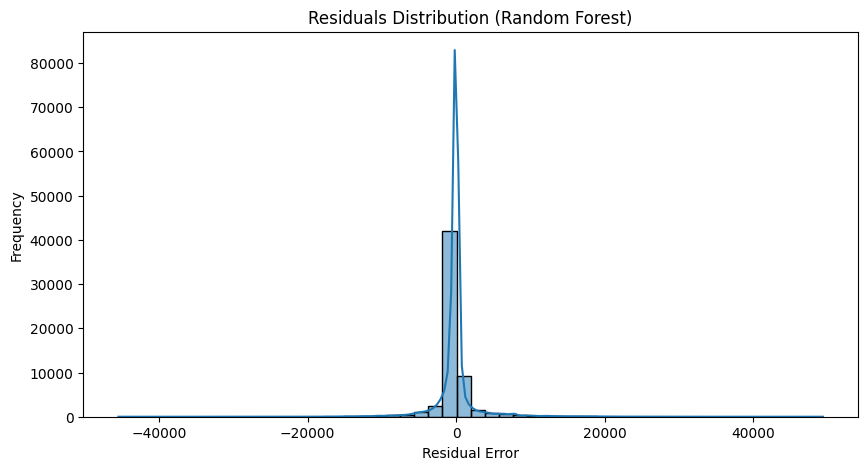

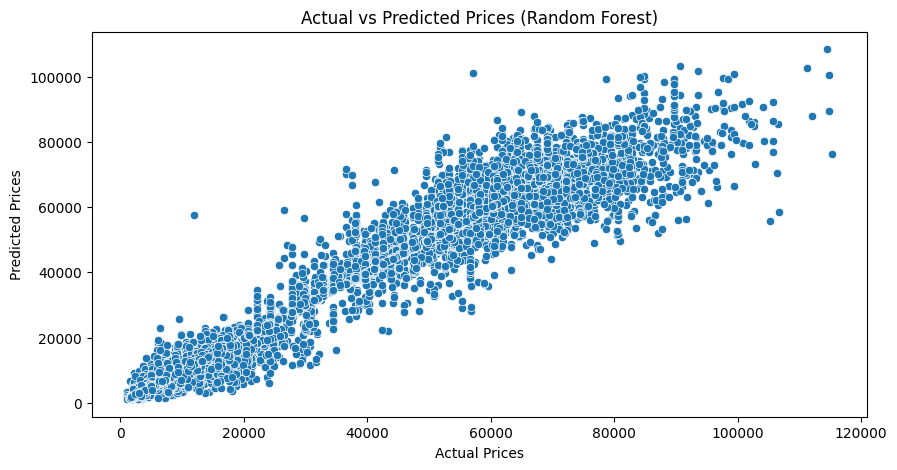

In [10]:
# Visualization
plt.figure(figsize=(10,5))
sns.histplot(y_test - models[best_model].predict(X_test), bins=50, kde=True)
plt.title(f"Residuals Distribution ({best_model})")
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=models[best_model].predict(X_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Actual vs Predicted Prices ({best_model})")
plt.show()